In [53]:
#Import the necessary libraries 
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns

In [54]:
#Importing the dataset
ins = pd.read_csv('insurance.csv')

In [55]:
ins.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [56]:
#Read the data as a data frame 
from numpy.random import randn
np.random.seed(1)

In [57]:
#Read the data as a data frame 
df = pd.DataFrame(randn(10,7),index='0 1 2 3 4 5 6 7 8 9'.split(),columns='age sex bmi children smoker region charges'.split())

In [58]:
df

age       sex       bmi  children    smoker    region   charges
0  1.624345 -0.611756 -0.528172 -1.072969  0.865408 -2.301539  1.744812
1 -0.761207  0.319039 -0.249370  1.462108 -2.060141 -0.322417 -0.384054
2  1.133769 -1.099891 -0.172428 -0.877858  0.042214  0.582815 -1.100619
3  1.144724  0.901591  0.502494  0.900856 -0.683728 -0.122890 -0.935769
4 -0.267888  0.530355 -0.691661 -0.396754 -0.687173 -0.845206 -0.671246
5 -0.012665 -1.117310  0.234416  1.659802  0.742044 -0.191836 -0.887629
6 -0.747158  1.692455  0.050808 -0.636996  0.190915  2.100255  0.120159
7  0.617203  0.300170 -0.352250 -1.142518 -0.349343 -0.208894  0.586623
8  0.838983  0.931102  0.285587  0.885141 -0.754398  1.252868  0.512930
9 -0.298093  0.488518 -0.075572  1.131629  1.519817  2.185575 -1.396496

a. Shape of the data

In [59]:
#Shape of data
ins.shape

(1338, 7)

b. Data type of each attribute 

In [60]:
#Data type of each attribute
ins.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

c. Checking the presence of missing values 

In [61]:
#Checking the presence of missing values 
ins.isnull()

age    sex    bmi  children  smoker  region  charges
0     False  False  False     False   False   False    False
1     False  False  False     False   False   False    False
2     False  False  False     False   False   False    False
3     False  False  False     False   False   False    False
4     False  False  False     False   False   False    False
...     ...    ...    ...       ...     ...     ...      ...
1333  False  False  False     False   False   False    False
1334  False  False  False     False   False   False    False
1335  False  False  False     False   False   False    False
1336  False  False  False     False   False   False    False
1337  False  False  False     False   False   False    False

[1338 rows x 7 columns]

d. 5 point summary of numerical attributes

In [62]:
#5 point summary
print('min: %.1f' % np.min(ins.age))
print('25 percentile: %.1f' % np.percentile(ins.age, 25))
print('median: %.1f' % np.median(ins['age']))
print('75 percentile: %.1f' % np.percentile(ins.age, 75))
print('max: %.1f' % np.max(ins.age))

min: 18.0
25 percentile: 27.0
median: 39.0
75 percentile: 51.0
max: 64.0


e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns. 

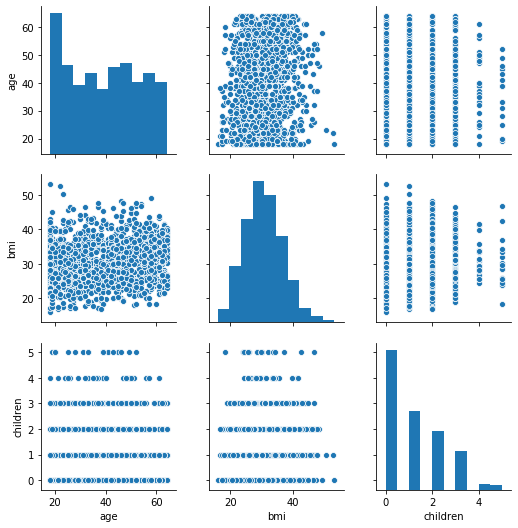

In [63]:
#Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.
sns.pairplot(ins[['age', 'bmi', 'children']])

f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

In [81]:
df.skew(axis = 0, skipna = True)

age         0.086892
sex        -0.298812
bmi         0.026232
children    0.035670
smoker     -0.256023
region     -0.099621
charges     0.908270
dtype: float64

g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

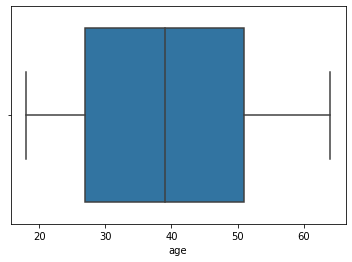

In [65]:
#Box plot is used to presence of outliers
sns.boxplot(x=ins['age'])

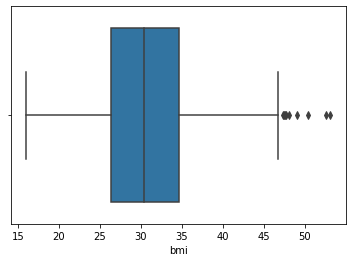

In [66]:
sns.boxplot(x=ins['bmi'])

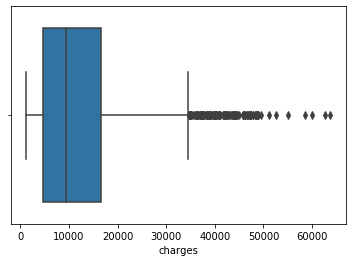

In [67]:
sns.boxplot(x=ins['charges'])

h. Distribution of categorical columns (include children)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000271B025A708>,
      dtype=object)

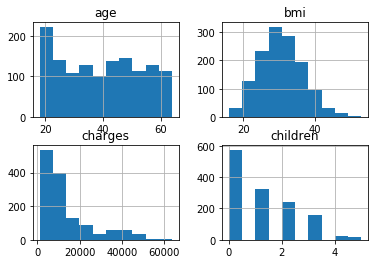

In [68]:
ins.hist()

i. Pair plot that includes all the columns of the data frame

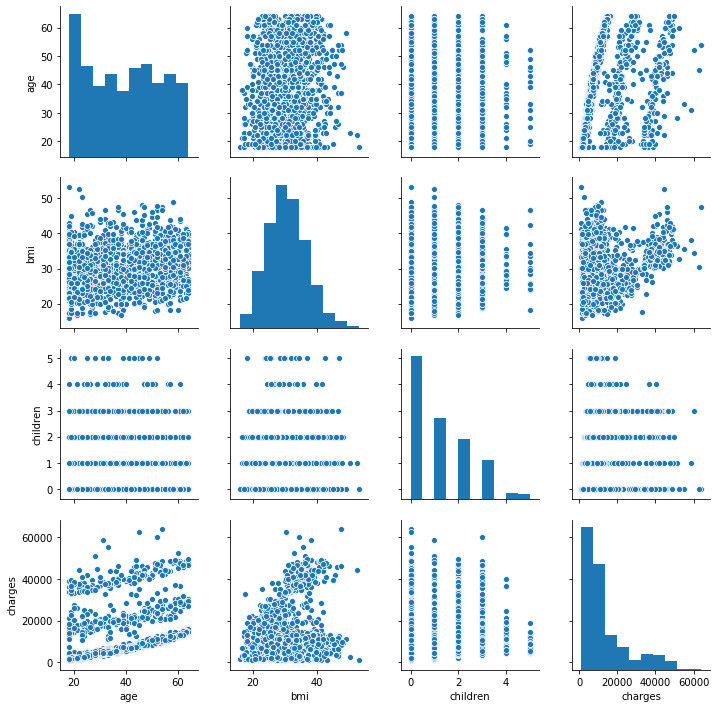

In [69]:
sns.pairplot(ins[['age', 'sex','bmi','children','smoker','region','charges']])

4. Answer the following questions with statistical evidence.

a. Do charges of people who smoke differ significantly from the people who
don't? 

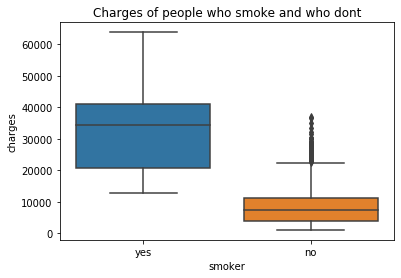

In [70]:
# Box plot is implemented to show the significant difference of people who smoke and people who don't.
sns.boxplot(x = "smoker", y = "charges", data = ins)
plt.title('Charges of people who smoke and who dont')
plt.show()

b. Does bmi of males differ significantly from that of females?

In [71]:
#This can be done using test of variances.
#Considering male and female of age 20 
twenty = ins[ins['age'] == 20]
twenty.sex.value_counts()

male      15
female    14
Name: sex, dtype: int64

In [72]:
s_male = twenty[twenty['sex'] == 'male'].bmi   
s_female = twenty[twenty['sex'] == 'female'].bmi

s1, s2 = np.var(s_female) , np.var(s_male)
print(s1,s2)

17.291358673469386 21.220498888888887


In [73]:
n = 14  # number of samples
dof = n - 1  # degrees of freedom
alpha = 0.05  # significance level
chi_critical = 23.68   # critical chi_squared statistic. From the table

In [74]:
chi = (dof*s1)/s2

if chi < chi_critical:
    print("Since the test value is less than the critical value, we fail to reject the null")
else:
    print("Since the test value is more than the critical value, we reject the null")

Since the test value is less than the critical value, we fail to reject the null


In [75]:
print(chi)

10.592949012749246


Therefore, bmi of males differ significantly from that of females.

c. Is the proportion of smokers significantly different in different genders?

In [76]:
#This is done by test of proportions.
f_smokers = ins[ins['sex'] == 'female'].smoker.value_counts()[1]  # number of female smokers
m_smokers = ins[ins['sex'] == 'male'].smoker.value_counts()[1] # number of male smokers
n_females = ins.sex.value_counts()[1] # number of females
n_males = ins.sex.value_counts()[0] #number of males 

In [77]:
print([f_smokers, m_smokers] )#Gender based count of smokers
print([n_females, n_males])#Gender based count of count of people  

[115, 159]
[662, 676]


In [78]:
print(f' Proportion of smokers in females,males is = {round(115/662,2)}%, {round(159/676,2)}% respectively')

 Proportion of smokers in females,males is = 0.17%, 0.24% respectively


In [79]:
from statsmodels.stats.proportion import proportions_ztest

stat, pval = proportions_ztest([f_smokers, m_smokers] , [n_females, n_males])

if pval < 0.05:
    print(f'With a p-value of {round(pval,4)} the difference is significant. Therefore,We reject the null')
else:
    print(f'With a p-value of {round(pval,4)} the difference is not significant. Therefore,We fail to reject the null')

With a p-value of 0.0053 the difference is significant. Therefore,We reject the null


Yes the proportion of smokers significantly different in different genders.

d. Is the distribution of bmi across women with no children, one child and
two children, the same?

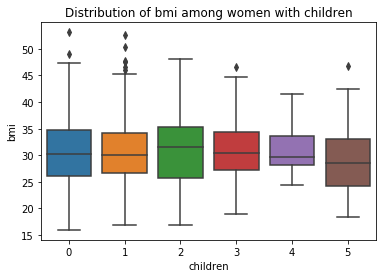

In [80]:
#The distribution of bmi among women can be represented using box plot.
sns.boxplot(x = "children", y = "bmi", data = ins)
plt.title('Distribution of bmi among women with children')
plt.show()